In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import pandas_profiling

In [2]:


df = pd.read_table('Airfares.txt', delim_whitespace=True,header=None,names=('City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market share','price'))

C:\Users\GURURAJAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\GURURAJAN\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [3]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share.1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [5]:
df.shape

(1000, 11)

We totally have 1000 rows and 11 columns

# Descriptive Statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market share.1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


# Checking for Null Values

In [7]:
df.isnull().sum()


City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share                 0
Average fare                 0
Low price airline            0
market share.1               0
price                        0
dtype: int64

In [8]:
numeric = df.select_dtypes(include=['float64', 'int64'])

In [9]:
categorical = df.select_dtypes(include=['object'])

In [10]:
df_categorical=df[['City1','City2','market leading airline','Low price airline']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City1,City2,market leading airline,Low price airline
0,16,0,6,8
1,16,40,6,6
2,2,0,4,5
3,2,7,14,17
4,2,52,12,17


In [11]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price,City1,City2,market leading airline,Low price airline
0,114.47,528,424.56,70.19,111.03,70.19,111.03,16,0,6,8
1,122.47,860,276.84,75.10,123.09,17.23,118.94,16,40,6,6
2,214.42,852,215.76,78.89,223.98,2.77,167.12,2,0,4,5
3,69.40,288,606.84,96.97,68.86,96.97,68.86,2,7,14,17
4,158.13,723,313.04,39.79,161.36,15.34,145.42,2,52,12,17


In [12]:
X =df.drop('Average Fare',axis=1)
y=df['Average Fare']

In [15]:
#Creating train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [16]:
from sklearn.ensemble import RandomForestRegressor


In [20]:
rf = RandomForestRegressor()

# Hyper Parameter Tunning

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [21]:
# Create the parameter grid 
params = {
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
             'n_estimators': [100,150,200],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10]
          }

n_folds = 5

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X,y)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7

In [22]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
729,0.435435,0.003657,0.010771,0.000399,9,2,2,100,"{'max_depth': 9, 'min_samples_leaf': 2, 'min_s...",0.989163,0.979267,0.968744,0.984856,0.97646,0.979698,0.007026,1
644,0.823597,0.013520,0.019348,0.001739,8,2,5,200,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.988995,0.978580,0.968742,0.984289,0.97750,0.979621,0.006835,2
819,0.454384,0.011027,0.011370,0.000489,10,2,2,100,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.989449,0.978838,0.968772,0.983514,0.97742,0.979598,0.006854,3
730,0.668013,0.015262,0.015758,0.001163,9,2,2,150,"{'max_depth': 9, 'min_samples_leaf': 2, 'min_s...",0.988965,0.978492,0.969094,0.983875,0.97745,0.979575,0.006667,4
733,0.641484,0.008137,0.016556,0.002720,9,2,5,150,"{'max_depth': 9, 'min_samples_leaf': 2, 'min_s...",0.989127,0.978920,0.968620,0.984148,0.97689,0.979541,0.006925,5


In [23]:
print(grid_search.best_params_)

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [25]:
rf=RandomForestRegressor(max_depth= 9, min_samples_leaf=2,min_samples_split=2, n_estimators=100)

In [26]:
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, pred_rf))
print(np.sqrt(mean_squared_error(y_test, pred_rf)))

5.039190907432254
8.340658911090113


# Feature importance

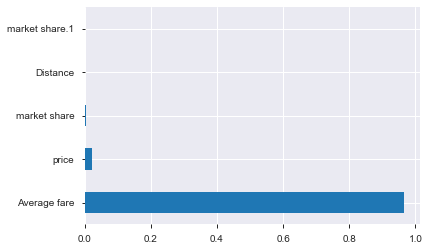

In [32]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')